In [1]:
import csv
import pandas as pd
from pandas import *
from __future__ import division
from pandas.tseries.offsets import *
import dateutil.rrule as dr
import dateutil.parser as dp
import dateutil.relativedelta as drel
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
pd.options.mode.chained_assignment = None

## Loading files

In [3]:
#spd = read_csv('http://real-chart.finance.yahoo.com/table.csv?s=%5EGSPC&a=00&b=1&c=1974&d=05&e=9&f=2015&g=d&ignore=.csv',
#               delimiter=',', header=0, 
#               names=['date','o','h','l','close','vol','c'])
#spw = read_csv('http://real-chart.finance.yahoo.com/table.csv?s=%5EGSPC&a=00&b=1&c=1974&d=05&e=9&f=2015&g=w&ignore=.csv',
#               delimiter=',', header=0, 
#               names=['date','o','h','l','close','vol','c'])

#http://real-chart.finance.yahoo.com/table.csv?s=DAL&a=04&b=3&c=2008&d=05&e=9&f=2015&g=d&ignore=.csv
#http://real-chart.finance.yahoo.com/table.csv?s=%5EGSPC&a=00&b=1&c=1974&d=05&e=9&f=2015&g=d&ignore=.csv

In [4]:
spd = read_csv('spd.csv', delimiter=',', header=0)
spw = read_csv('spw.csv', delimiter=',', header=0)

In [5]:
spd.rename(columns={'Unnamed: 0':'nrow'}, inplace=True)
spw.rename(columns={'Unnamed: 0':'nrow'}, inplace=True)

In [6]:
spd['date'] = pd.to_datetime(spd['date'])
spw['date'] = pd.to_datetime(spw['date'])
print type(spd.date[0]), type(spw.date[0])

<class 'pandas.tslib.Timestamp'> <class 'pandas.tslib.Timestamp'>


In [7]:
spd.head(3)

,nrow,date,o,h,l,close,vol,c
0,0,2015-06-05,2095.09009,2100.98999,2085.66992,2092.83008,3243690000,2092.83008
1,1,2015-06-04,2112.35010,2112.88989,2093.22998,2095.84009,3200050000,2095.84009
2,2,2015-06-03,2110.63989,2121.91992,2109.61011,2114.07007,3099980000,2114.07007


In [8]:
spd.tail(3)

,nrow,date,o,h,l,close,vol,c
10449,10449,1974-01-04,99.80,100.70,97.70,98.90,21700000,98.90
10450,10450,1974-01-03,98.02,100.94,98.02,99.80,24850000,99.80
10451,10451,1974-01-02,97.55,98.38,96.25,97.68,12060000,97.68


In [9]:
spw.head(3)

,nrow,date,o,h,l,close,vol,c
0,0,2015-06-01,2108.63989,2121.91992,2085.66992,2092.83008,3120956000,2092.83008
1,1,2015-05-26,2125.34009,2126.21997,2099.17993,2107.38989,3344457500,2107.38989
2,2,2015-05-18,2121.30005,2134.71997,2120.01001,2126.06006,2970484000,2126.06006


In [10]:
spw.tail(3)

,nrow,date,o,h,l,close,vol,c
2159,2159,1974-01-14,93.66,98.35,92.35,95.56,16060000,95.56
2160,2160,1974-01-07,98.90,99.31,91.62,93.66,17296000,93.66
2161,2161,1974-01-02,97.55,100.94,96.25,98.90,19536600,98.90


In [11]:
len(spd)

10452

In [12]:
len(spw)

2162

In [13]:
spd.date[spd.date == dp.parse("20/03/2008")] = pd.to_datetime(dp.parse("21/03/2008"))

In [14]:
spd.date[spd.date == dp.parse("21/04/2011")] = pd.to_datetime(dp.parse("22/04/2011"))

In [15]:
spd.date[spd.date == dp.parse("20/04/2000")] = pd.to_datetime(dp.parse("21/04/2000"))

In [16]:
spd.date[spd.date == dp.parse("19/04/1984")] = pd.to_datetime(dp.parse("20/04/1984"))

In [17]:
for i in range(len(spw.date)):
    spw.date[i] = spw.date[i] + DateOffset(weekday = 4) + DateOffset(days = 1) - BDay()
#    if spw.date[i] == dp.parse("21/03/2008"):
#        spw.date[i] = pd.to_datetime(dp.parse("20/03/2008"))

In [18]:
spw.head(3)

,nrow,date,o,h,l,close,vol,c
0,0,2015-06-05,2108.63989,2121.91992,2085.66992,2092.83008,3120956000,2092.83008
1,1,2015-05-29,2125.34009,2126.21997,2099.17993,2107.38989,3344457500,2107.38989
2,2,2015-05-22,2121.30005,2134.71997,2120.01001,2126.06006,2970484000,2126.06006


In [19]:
spw.tail(3)

,nrow,date,o,h,l,close,vol,c
2159,2159,1974-01-18,93.66,98.35,92.35,95.56,16060000,95.56
2160,2160,1974-01-11,98.90,99.31,91.62,93.66,17296000,93.66
2161,2161,1974-01-04,97.55,100.94,96.25,98.90,19536600,98.90


## Moving Averages

In [20]:
d12 = []
d24 = []
d48 = []
d72 = []
d96 = []
d192 = []
d288 = []
for i in range(len(spd)-288):
    d12.append(sum(spd.c[i:(i+12)])/12)
    d24.append(sum(spd.c[i:(i+24)])/24)
    d48.append(sum(spd.c[i:(i+48)])/48)
    d72.append(sum(spd.c[i:(i+72)])/72)
    d96.append(sum(spd.c[i:(i+96)])/96)
    d192.append(sum(spd.c[i:(i+192)])/192)
    d288.append(sum(spd.c[i:(i+288)])/288)
    
d192[-1]

75.564843749999994

In [21]:
w12 = []
w24 = []
w48 = []
w72 = []
w96 = []
w192 = []
w288 = []
for i in range(len(spw)-288):
    w12.append(sum(spw.c[i:(i+12)])/12)
    w24.append(sum(spw.c[i:(i+24)])/24)
    w48.append(sum(spw.c[i:(i+48)])/48)
    w72.append(sum(spw.c[i:(i+72)])/72)
    w96.append(sum(spw.c[i:(i+96)])/96)
    w192.append(sum(spw.c[i:(i+192)])/192)
    w288.append(sum(spw.c[i:(i+288)])/288)
    
w192[-1]

98.690937500000004

## Indicators

In [22]:
ltd = []
for i in range(len(spd)-288):
    t12 = ((spd.c[i]/(sum(spd.c[(i+6):(i+12)])/6)-1)*100)
    t24 = ((spd.c[i]/(sum(spd.c[(i+18):(i+24)])/6)-1)*100)
    t48 = ((spd.c[i]/(sum(spd.c[(i+42):(i+48)])/6)-1)*100)
    t72 = ((spd.c[i]/(sum(spd.c[(i+66):(i+72)])/6)-1)*100)
    t96 = ((spd.c[i]/(sum(spd.c[(i+90):(i+96)])/6)-1)*100)
    t192 = ((spd.c[i]/(sum(spd.c[(i+186):(i+192)])/6)-1)*100)
    t288 = ((spd.c[i]/(sum(spd.c[(i+282):(i+288)])/6)-1)*100)
    ltd.append((t12+t24+t48+t72+t96+t192+t288)/7)
ltd.extend([0]*288)

In [23]:
ltw = []
for i in range(len(spw)-288):
    t12 = ((spw.c[i]/(sum(spw.c[(i+6):(i+12)])/6)-1)*100)
    t24 = ((spw.c[i]/(sum(spw.c[(i+18):(i+24)])/6)-1)*100)
    t48 = ((spw.c[i]/(sum(spw.c[(i+42):(i+48)])/6)-1)*100)
    t72 = ((spw.c[i]/(sum(spw.c[(i+66):(i+72)])/6)-1)*100)
    t96 = ((spw.c[i]/(sum(spw.c[(i+90):(i+96)])/6)-1)*100)
    t192 = ((spw.c[i]/(sum(spw.c[(i+186):(i+192)])/6)-1)*100)
    t288 = ((spw.c[i]/(sum(spw.c[(i+282):(i+288)])/6)-1)*100)
    ltw.append((t12+t24+t48+t72+t96+t192+t288)/7)
ltw.extend([0]*288)

In [24]:
print max(ltd), min(ltd), max(ltw), min (ltw)

23.3328730247 -35.6366113852 71.7672905577 -41.5810396385


In [25]:
print ltd.index(max(ltd)), ltd.index(min(ltd)), ltw.index(max(ltw)), ltw.index(min(ltw))

8089 1644 881 326


In [26]:
lc288d = []
lc72d = []
for i in range(len(spd)-288):
    min12 = ((spd.c[i]/min(spd.c[(i+6):(i+12)]))-1)*100
    max12 = ((spd.c[i]/max(spd.c[(i+6):(i+12)]))-1)*100
    min24 = ((spd.c[i]/min(spd.c[(i+18):(i+24)]))-1)*100
    max24 = ((spd.c[i]/max(spd.c[(i+18):(i+24)]))-1)*100
    min48 = ((spd.c[i]/min(spd.c[(i+42):(i+48)]))-1)*100
    max48 = ((spd.c[i]/max(spd.c[(i+42):(i+48)]))-1)*100
    min72 = ((spd.c[i]/min(spd.c[(i+66):(i+72)]))-1)*100
    max72 = ((spd.c[i]/max(spd.c[(i+66):(i+72)]))-1)*100
    min96 = ((spd.c[i]/min(spd.c[(i+90):(i+96)]))-1)*100
    max96 = ((spd.c[i]/max(spd.c[(i+90):(i+96)]))-1)*100
    min192 = ((spd.c[i]/min(spd.c[(i+186):(i+192)]))-1)*100
    max192 = ((spd.c[i]/max(spd.c[(i+186):(i+192)]))-1)*100
    min288 = ((spd.c[i]/min(spd.c[(i+282):(i+288)]))-1)*100
    max288 = ((spd.c[i]/max(spd.c[(i+282):(i+288)]))-1)*100
    
    clong288 = 0
    clong72 = 0
    cshort288 = 0
    cshort72 = 0
    
    contatl = 0
    if spd.c[i] < sum(spd.c[i:i+12])/12:
        contatl += 1
    if spd.c[i] > spd.c[i+12]:
        contatl += 1
    if max12 > 0:
        contatl += 1
    contats = 0
    if spd.c[i] > sum(spd.c[i:i+12])/12:
        contats -= 1
    if spd.c[i] < spd.c[i+12]:
        contats -= 1
    if min12 < 0:
        contats -= 1
    if contatl == 3 or contats == -3:
        c12 = (((sum(spd.c[i:(i+12)])/12)/spd.c[i])-1)*100
    else:
        c12 = 0
    if contatl == 3:
        clong288 += 1
        clong72 += 1
    if contats == -3:
        cshort288 += 1
        cshort72 += 1
        
    contatl = 0
    if spd.c[i] < sum(spd.c[i:i+24])/24:
        contatl +=1
    if spd.c[i] > spd.c[i+24]:
        contatl +=1
    if max24 > 0:
        contatl +=1
    contats = 0
    if spd.c[i] > sum(spd.c[i:i+24])/24:
        contats -=1
    if spd.c[i] < spd.c[i+24]:
        contats -=1
    if min24 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c24 = (((sum(spd.c[i:(i+24)])/24)/spd.c[i])-1)*100
    else:
        c24 = 0
    if contatl == 3:
        clong288 +=1
        clong72 +=1
    if contats == -3:
        cshort288 +=1
        cshort72 +=1
        
    contatl = 0
    if spd.c[i] < sum(spd.c[i:i+48])/48:
        contatl +=1
    if spd.c[i] > spd.c[i+48]:
        contatl +=1
    if max48 > 0:
        contatl +=1
    contats = 0
    if spd.c[i] > sum(spd.c[i:i+48])/48:
        contats -=1
    if spd.c[i] < spd.c[i+48]:
        contats -=1
    if min48 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c48 = (((sum(spd.c[i:(i+48)])/48)/spd.c[i])-1)*100
    else:
        c48 = 0    
    if contatl == 3:
        clong288 +=1
        clong72 +=1
    if contats == -3:
        cshort288 +=1
        cshort72 +=1
    
    contatl = 0
    if spd.c[i] < sum(spd.c[i:i+72])/72:
        contatl +=1
    if spd.c[i] > spd.c[i+72]:
        contatl +=1
    if max72 > 0:
        contatl +=1
    contats = 0
    if spd.c[i] > sum(spd.c[i:i+72])/72:
        contats -=1
    if spd.c[i] < spd.c[i+72]:
        contats -=1
    if min72 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c72 = (((sum(spd.c[i:(i+72)])/72)/spd.c[i])-1)*100
    else:
        c72 = 0  
    if contatl == 3:
        clong288 +=1
        clong72 +=1
    if contats == -3:
        cshort288 +=1
        cshort72 +=1
    
    contatl = 0
    if spd.c[i] < sum(spd.c[i:i+96])/96:
        contatl +=1
    if spd.c[i] > spd.c[i+96]:
        contatl +=1
    if max96 > 0:
        contatl +=1
    contats = 0
    if spd.c[i] > sum(spd.c[i:i+96])/96:
        contats -=1
    if spd.c[i] < spd.c[i+96]:
        contats -=1
    if min96 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c96 = (((sum(spd.c[i:(i+96)])/96)/spd.c[i])-1)*100
    else:
        c96 = 0
    if contatl == 3:
        clong288 +=1
    if contats == -3:
        cshort288 +=1
        
    contatl = 0
    if spd.c[i] < sum(spd.c[i:i+192])/192:
        contatl +=1
    if spd.c[i] > spd.c[i+192]:
        contatl +=1
    if max192 > 0:
        contatl +=1
    contats = 0
    if spd.c[i] > sum(spd.c[i:i+192])/192:
        contats -=1
    if spd.c[i] < spd.c[i+192]:
        contats -=1
    if min192 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c192 = (((sum(spd.c[i:(i+192)])/192)/spd.c[i])-1)*100
    else:
        c192 = 0      
    if contatl == 3:
        clong288 +=1
    if contats == -3:
        cshort288 +=1
        
    contatl = 0
    if spd.c[i] < sum(spd.c[i:i+288])/288:
        contatl +=1
    if spd.c[i] > spd.c[i+288]:
        contatl +=1
    if max288 > 0:
        contatl +=1
    contats = 0
    if spd.c[i] > sum(spd.c[i:i+288])/288:
        contats -=1
    if spd.c[i] < spd.c[i+288]:
        contats -=1
    if min288 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c288 = (((sum(spd.c[i:(i+288)])/288)/spd.c[i])-1)*100
    else:
        c288 = 0
    if contatl == 3:
        clong288 +=1
    if contats == -3:
        cshort288 += 1

    if (clong288 + cshort288) > 0:
        ctot288 = (clong288 + cshort288)
    else:
        ctot288 = 1
    lc288d.append((c12+c24+c48+c72+c96+c192+c288)/ctot288)
    
    if (clong72 + cshort72) > 0:
        ctot72 = (clong72 + cshort72)
    else:
        ctot72 = 1
    lc72d.append((c12+c24+c48+c72)/ctot72)
lc288d.extend([0]*288)
lc72d.extend([0]*288)

In [27]:
print max(lc288d), min(lc288d), max(lc72d), min(lc72d)

17.8730822728 -15.697302014 4.46218397049 -6.65612346649


In [28]:
print lc288d.index(max(lc288d)), lc288d.index(min(lc288d)), lc72d.index(max(lc72d)), lc72d.index(min(lc72d))

6948 1399 9236 1544


In [29]:
print spd.date[1644]

2008-11-20 00:00:00


In [30]:
print lc288d[0], lc72d[0]

0.45128917609 0.45128917609


In [31]:
lc288w = []
lc72w = []
for i in range(len(spw)-288):
    min12 = ((spw.c[i]/min(spw.c[(i+6):(i+12)]))-1)*100
    max12 = ((spw.c[i]/max(spw.c[(i+6):(i+12)]))-1)*100
    min24 = ((spw.c[i]/min(spw.c[(i+18):(i+24)]))-1)*100
    max24 = ((spw.c[i]/max(spw.c[(i+18):(i+24)]))-1)*100
    min48 = ((spw.c[i]/min(spw.c[(i+42):(i+48)]))-1)*100
    max48 = ((spw.c[i]/max(spw.c[(i+42):(i+48)]))-1)*100
    min72 = ((spw.c[i]/min(spw.c[(i+66):(i+72)]))-1)*100
    max72 = ((spw.c[i]/max(spw.c[(i+66):(i+72)]))-1)*100
    min96 = ((spw.c[i]/min(spw.c[(i+90):(i+96)]))-1)*100
    max96 = ((spw.c[i]/max(spw.c[(i+90):(i+96)]))-1)*100
    min192 = ((spw.c[i]/min(spw.c[(i+186):(i+192)]))-1)*100
    max192 = ((spw.c[i]/max(spw.c[(i+186):(i+192)]))-1)*100
    min288 = ((spw.c[i]/min(spw.c[(i+282):(i+288)]))-1)*100
    max288 = ((spw.c[i]/max(spw.c[(i+282):(i+288)]))-1)*100
    
    clong288 = 0
    clong72 = 0
    cshort288 = 0
    cshort72 = 0
    
    contatl = 0
    if spw.c[i] < sum(spw.c[i:i+12])/12:
        contatl += 1
    if spw.c[i] > spw.c[i+12]:
        contatl += 1
    if max12 > 0:
        contatl += 1
    contats = 0
    if spw.c[i] > sum(spw.c[i:i+12])/12:
        contats -= 1
    if spw.c[i] < spw.c[i+12]:
        contats -= 1
    if min12 < 0:
        contats -= 1
    if contatl == 3 or contats == -3:
        c12 = (((sum(spw.c[i:(i+12)])/12)/spw.c[i])-1)*100
    else:
        c12 = 0
    if contatl == 3:
        clong288 += 1
        clong72 += 1
    if contats == -3:
        cshort288 += 1
        cshort72 += 1
        
    contatl = 0
    if spw.c[i] < sum(spw.c[i:i+24])/24:
        contatl +=1
    if spw.c[i] > spw.c[i+24]:
        contatl +=1
    if max24 > 0:
        contatl +=1
    contats = 0
    if spw.c[i] > sum(spw.c[i:i+24])/24:
        contats -=1
    if spw.c[i] < spw.c[i+24]:
        contats -=1
    if min24 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c24 = (((sum(spw.c[i:(i+24)])/24)/spw.c[i])-1)*100
    else:
        c24 = 0
    if contatl == 3:
        clong288 +=1
        clong72 +=1
    if contats == -3:
        cshort288 +=1
        cshort72 +=1
        
    contatl = 0
    if spw.c[i] < sum(spw.c[i:i+48])/48:
        contatl +=1
    if spw.c[i] > spw.c[i+48]:
        contatl +=1
    if max48 > 0:
        contatl +=1
    contats = 0
    if spw.c[i] > sum(spw.c[i:i+48])/48:
        contats -=1
    if spw.c[i] < spw.c[i+48]:
        contats -=1
    if min48 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c48 = (((sum(spw.c[i:(i+48)])/48)/spw.c[i])-1)*100
    else:
        c48 = 0    
    if contatl == 3:
        clong288 +=1
        clong72 +=1
    if contats == -3:
        cshort288 +=1
        cshort72 +=1
    
    contatl = 0
    if spw.c[i] < sum(spw.c[i:i+72])/72:
        contatl +=1
    if spw.c[i] > spw.c[i+72]:
        contatl +=1
    if max72 > 0:
        contatl +=1
    contats = 0
    if spw.c[i] > sum(spw.c[i:i+72])/72:
        contats -=1
    if spw.c[i] < spw.c[i+72]:
        contats -=1
    if min72 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c72 = (((sum(spw.c[i:(i+72)])/72)/spw.c[i])-1)*100
    else:
        c72 = 0  
    if contatl == 3:
        clong288 +=1
        clong72 +=1
    if contats == -3:
        cshort288 +=1
        cshort72 +=1
    
    contatl = 0
    if spw.c[i] < sum(spw.c[i:i+96])/96:
        contatl +=1
    if spw.c[i] > spw.c[i+96]:
        contatl +=1
    if max96 > 0:
        contatl +=1
    contats = 0
    if spw.c[i] > sum(spw.c[i:i+96])/96:
        contats -=1
    if spw.c[i] < spw.c[i+96]:
        contats -=1
    if min96 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c96 = (((sum(spw.c[i:(i+96)])/96)/spw.c[i])-1)*100
    else:
        c96 = 0
    if contatl == 3:
        clong288 +=1
    if contats == -3:
        cshort288 +=1
        
    contatl = 0
    if spw.c[i] < sum(spw.c[i:i+192])/192:
        contatl +=1
    if spw.c[i] > spw.c[i+192]:
        contatl +=1
    if max192 > 0:
        contatl +=1
    contats = 0
    if spw.c[i] > sum(spw.c[i:i+192])/192:
        contats -=1
    if spw.c[i] < spw.c[i+192]:
        contats -=1
    if min192 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c192 = (((sum(spw.c[i:(i+192)])/192)/spw.c[i])-1)*100
    else:
        c192 = 0      
    if contatl == 3:
        clong288 +=1
    if contats == -3:
        cshort288 +=1
        
    contatl = 0
    if spw.c[i] < sum(spw.c[i:i+288])/288:
        contatl +=1
    if spw.c[i] > spw.c[i+288]:
        contatl +=1
    if max288 > 0:
        contatl +=1
    contats = 0
    if spw.c[i] > sum(spw.c[i:i+288])/288:
        contats -=1
    if spw.c[i] < spw.c[i+288]:
        contats -=1
    if min288 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c288 = (((sum(spw.c[i:(i+288)])/288)/spw.c[i])-1)*100
    else:
        c288 = 0
    if contatl == 3:
        clong288 +=1
    if contats == -3:
        cshort288 += 1

    if (clong288 + cshort288) > 0:
        ctot288 = (clong288 + cshort288)
    else:
        ctot288 = 1
    lc288w.append((c12+c24+c48+c72+c96+c192+c288)/ctot288)
    
    if (clong72 + cshort72) > 0:
        ctot72 = (clong72 + cshort72)
    else:
        ctot72 = 1
    lc72w.append((c12+c24+c48+c72)/ctot72)
lc288w.extend([0]*288)
lc72w.extend([0]*288)

In [32]:
print max(lc288w), min(lc288w), max(lc72w), min(lc72w)

42.2414297463 -15.094582949 9.81403250041 -13.8656712844


In [33]:
print lc288w.index(max(lc288w)), lc288w.index(min(lc288w)), lc72w.index(max(lc72w)), lc72w.index(min(lc72w))

662 214 1426 284


In [34]:
print spw.date[214]

2011-04-29 00:00:00


In [35]:
print lc288w[0], lc72w[0]

0.0 0.0


In [36]:
ldd = []
for i in range(len(spd)-288):
    ld = (((d12[i]*12)+(d24[i]*24)+(d48[i]*48)+(d72[i]*72)+(d96[i]*96)+(d192[i]*192)+(d288[i]*288))/732)
    ldd.append(((ld/spd.c[i])-1)*100)
ldd.extend([0]*288)

In [37]:
print max(ldd), min(ldd)

60.3588420227 -16.6628320733


In [38]:
print ldd.index(max(ldd)), ldd.index(min(ldd))

1644 8217


In [39]:
print spd.date[8217]

1982-11-03 00:00:00


In [40]:
print ldd[0]

-2.07431921315


In [41]:
ldw = []
for i in range(len(spw)-288):
    ld = (((w12[i]*12)+(w24[i]*24)+(w48[i]*48)+(w72[i]*72)+(w96[i]*96)+(w192[i]*192)+(w288[i]*288))/732)
    ldw.append(((ld/spw.c[i])-1)*100)
ldw.extend([0]*288)

In [42]:
print max(ldw), min(ldw)

79.73482651 -34.846752505


In [43]:
print ldw.index(max(ldw)), ldw.index(min(ldw))

326 896


In [44]:
print spw.date[326]

2009-03-06 00:00:00


In [45]:
print ldw[0]

-17.8479186214


In [46]:
lmd = []
for i in range(len(spd)-288):
    lm = 0
    if spd.c[i] > d96[i] and spd.c[i] > d288[i]:
        lm = 1
    elif spd.c[i] < d96[i] and spd.c[i] < d288[i]:
        lm = -1
    lmd.append(lm)
lmd.extend([0]*288)

In [47]:
print max(lmd), min(lmd)

1 -1


In [48]:
print sum(lmd)/len(lmd)

0.420780711825


In [49]:
print lmd[0]

1


In [50]:
lmw = []
for i in range(len(spw)-288):
    lm = 0
    if spw.c[i] > w96[i] and spw.c[i] > w288[i]:
        lm = 1
    elif spw.c[i] < w96[i] and spw.c[i] < w288[i]:
        lm = -1
    lmw.append(lm)    
lmw.extend([0]*288)

In [51]:
print max(lmw), min(lmw)

1 -1


In [52]:
print sum(lmw)/len(lmw)

0.551341350601


In [53]:
print lmw[0]

1


In [54]:
spd['lixt'] = ltd
spd['lixc72'] = lc72d
spd['lixc288'] = lc288d
spd['lixd'] = ldd
spd['lixm'] = lmd
spd.head(3)

,nrow,date,o,h,l,close,vol,c,lixt,lixc72,lixc288,lixd,lixm
0,0,2015-06-05,2095.09009,2100.98999,2085.66992,2092.83008,3243690000,2092.83008,2.523671,0.451289,0.451289,-2.074319,1
1,1,2015-06-04,2112.35010,2112.88989,2093.22998,2095.84009,3200050000,2095.84009,2.733611,0.275403,0.275403,-2.240354,1
2,2,2015-06-03,2110.63989,2121.91992,2109.61011,2114.07007,3099980000,2114.07007,3.870495,0.000000,0.000000,-3.114668,1


In [55]:
spw['lixt'] = ltw
spw['lixc72'] = lc72w
spw['lixc288'] = lc288w
spw['lixd'] = ldw
spw['lixm'] = lmw
spw.head(3)

,nrow,date,o,h,l,close,vol,c,lixt,lixc72,lixc288,lixd,lixm
0,0,2015-06-05,2108.63989,2121.91992,2085.66992,2092.83008,3120956000,2092.83008,29.583573,0,0,-17.847919,1
1,1,2015-05-29,2125.34009,2126.21997,2099.17993,2107.38989,3344457500,2107.38989,31.080824,0,0,-18.595005,1
2,2,2015-05-22,2121.30005,2134.71997,2120.01001,2126.06006,2970484000,2126.06006,32.704591,0,0,-19.499769,1


## Building samples dataset (predict all 3 months of the quarter)

In [56]:
exp = []
d = dp.parse("21/03/2015")
while d > dp.parse("20/03/1980"):
    d = d - WeekOfMonth(weekday = 4, week = 2) + DateOffset(days = 1) - BDay()
#    if d != dp.parse("21/09/2001"):
    exp.append(d)
    d = d - DateOffset(days = 80)

len(exp)

141

In [57]:
q1c = []
q1cstd = []
q1high = []
q1low = []
q1range = []
q1middle = []
q1pos = []
q0c = []
q0cstd = []
q0high = []
q0low = []
q0spanmean = []
q0spanstd = []
q0lixt = []
q0lixc72 = []
q0lixc288 = []
q0lixd = []
q0lixm = []
q0lixtv = []
q0lixc72v = []
q0lixc288v = []
q0lixdv = []
q0lixmv = []
m0c = []
m0cstd = []
m0high = []
m0low = []
m0spanmean = []
m0spanstd = []
m0lixt = []
m0lixc72 = []
m0lixc288 = []
m0lixd = []
m0lixm = []
m0lixtv = []
m0lixc72v = []
m0lixc288v = []
m0lixdv = []
m0lixmv = []

In [58]:
for q1end in exp:
    q1start = q1end - DateOffset(weeks = 13)
    m0start = q1start - DateOffset(weeks = 4)
    q0start = q1start - DateOffset(weeks = 13)
    q1indend = spw.nrow[spw.date == q1end]
    
    q1cstart = float(spw.c[q1indend + 13])
    q1cend = float(spw.c[q1indend])    
    q1cv = ((q1cend/q1cstart)-1)*100
    q1c.append(q1cv)   
    
    q1clist = spd.c[(spd.date >= q1start) & (spd.date<= q1end)]
    q1clist = q1clist.reset_index(drop=True)
    q1cvars = []
    for i in range(len(q1clist)):
        if i < len(q1clist)-1:
            q1cvars.append(((q1clist[i]/q1clist[i+1])-1)*100)
    q1cstd.append(np.std(q1cvars))
    
    q1chigh = ((np.max(q1clist)/q1cstart)-1)*100
    q1high.append(q1chigh)
    
    q1clow = ((np.min(q1clist)/q1cstart)-1)*100
    q1low.append(q1clow)
    
    q1crange = q1chigh - q1clow
    q1range.append(q1crange)
    
    q1cmiddle = q1chigh - (q1crange / 2)
    q1middle.append(q1cmiddle)
    
    q1cpos = (((q1cv - q1clow)/q1crange)-0.5)*200
    q1pos.append(q1cpos)
    
    q1indstart = spw.nrow[spw.date == q1start]
    
    q0cstart = float(spw.c[q1indstart + 13])
    q0cend = float(spw.c[q1indstart])    
    q0cv = ((q0cend/q0cstart)-1)*100
    q0c.append(q0cv)
    
    q0clist = spd.c[(spd.date >= q0start) & (spd.date<= q1start)]
    q0clist = q0clist.reset_index(drop=True)
    q0cvars = []
    for i in range(len(q0clist)):
        if i < len(q0clist)-1:
            q0cvars.append(((q0clist[i]/q0clist[i+1])-1)*100)
    q0cstd.append(np.std(q0cvars))
    
    q0hlist = spd.h[(spd.date >= q0start) & (spd.date<= q1start)]
    q0hlist = q0hlist.reset_index(drop=True)
    q0hvars = []
    for i in range(len(q0hlist)):
        q0hvars.append(((q0hlist[i]/q0clist[i])-1)*100)
    q0high.append(np.mean(q0hvars))
    
    q0llist = spd.l[(spd.date >= q0start) & (spd.date<= q1start)]
    q0llist = q0llist.reset_index(drop=True)
    q0lvars = []
    for i in range(len(q0llist)):
        q0lvars.append(((q0llist[i]/q0clist[i])-1)*100)
    q0low.append(np.mean(q0lvars))
    
    q0svars = []
    for i in range(len(q0llist)):
        q0svars.append(((q0hlist[i]/q0llist[i])-1)*100)
    q0spanmean.append(np.mean(q0svars))
    q0spanstd.append(np.std(q0svars))

    lixt1 = float((spw.lixt[spw.date == q1start]))
    lixt0 = float((spw.lixt[spw.date == q0start]))
    lixtm1 = float((spd.lixt[spd.date == q1start]))
    lixtm0 = float((spd.lixt[spd.date == m0start]))
    q0lixt.append(float(lixt1))
    q0lixtv.append(float(lixt1 - lixt0))
    m0lixt.append(float(lixtm1))
    m0lixtv.append(float(lixtm1 - lixtm0))
    
    lixc721 = float((spw.lixc72[spw.date == q1start]))
    lixc720 = float((spw.lixc72[spw.date == q0start]))
    lixc72m1 = float((spd.lixc72[spd.date == q1start]))
    lixc72m0 = float((spd.lixc72[spd.date == m0start]))
    q0lixc72.append(float(lixc721))
    q0lixc72v.append(float(lixc721 - lixc720))
    m0lixc72.append(float(lixc72m1))
    m0lixc72v.append(float(lixc72m1 - lixc72m0))
    
    lixc2881 = float((spw.lixc288[spw.date == q1start]))
    lixc2880 = float((spw.lixc288[spw.date == q0start]))
    lixc288m1 = float((spd.lixc288[spd.date == q1start]))
    lixc288m0 = float((spd.lixc288[spd.date == m0start]))
    q0lixc288.append(float(lixc2881))
    q0lixc288v.append(float(lixc2881 - lixc2880))
    m0lixc288.append(float(lixc288m1))
    m0lixc288v.append(float(lixc288m1 - lixc288m0))
    
    lixd1 = float((spw.lixd[spw.date == q1start]))
    lixd0 = float((spw.lixd[spw.date == q0start]))
    lixdm1 = float((spd.lixd[spd.date == q1start]))
    lixdm0 = float((spd.lixd[spd.date == m0start]))
    q0lixd.append(float(lixd1))
    q0lixdv.append(float(lixd1 - lixd0))
    m0lixd.append(float(lixdm1))
    m0lixdv.append(float(lixdm1 - lixdm0))
    
    lixm1 = float((spw.lixm[spw.date == q1start]))
    lixm0 = float((spw.lixm[spw.date == q0start]))
    lixmm1 = float((spd.lixm[spd.date == q1start]))
    lixmm0 = float((spd.lixm[spd.date == m0start]))
    q0lixm.append(float(lixm1))
    q0lixmv.append(float(lixm1 - lixm0))
    m0lixm.append(float(lixmm1))
    m0lixmv.append(float(lixmm1 - lixmm0))
    
    q1indstart = spw.nrow[spw.date == q1start]
    
    m0cstart = float(spw.c[q1indstart + 4])
    m0cend = q0cend  
    m0cv = ((m0cend/m0cstart)-1)*100
    m0c.append(float(m0cv))
    
    m0clist = spd.c[(spd.date >= m0start) & (spd.date<= q1start)]
    m0clist = m0clist.reset_index(drop=True)
    m0cvars = []
    for i in range(len(m0clist)):
        if i < len(m0clist)-1:
            m0cvars.append(float(((m0clist[i]/m0clist[i+1])-1)*100))
    m0cstd.append(float(np.std(m0cvars)))
    
    m0hlist = spd.h[(spd.date >= m0start) & (spd.date<= q1start)]
    m0hlist = m0hlist.reset_index(drop=True)
    m0hvars = []
    for i in range(len(m0hlist)):
        m0hvars.append(float(((m0hlist[i]/m0clist[i])-1)*100))
    m0high.append(float(np.mean(m0hvars)))
    
    m0llist = spd.l[(spd.date >= m0start) & (spd.date<= q1start)]
    m0llist = m0llist.reset_index(drop=True)
    m0lvars = []
    for i in range(len(m0llist)):
        m0lvars.append(float(((m0llist[i]/m0clist[i])-1)*100))
    m0low.append(float(np.mean(m0lvars)))
    
    m0svars = []
    for i in range(len(m0llist)):
        m0svars.append(float(((m0hlist[i]/m0llist[i])-1)*100))
    m0spanmean.append(float(np.mean(m0svars)))
    m0spanstd.append(float(np.std(m0svars)))

In [59]:
data = pd.DataFrame(index = exp, columns = ['q1c','q1cstd','q1high','q1low','q1range','q1middle','q1pos','q0c',
                                            'q0cstd','q0high','q0low','q0spanmean','q0spanstd','q0lixt','q0lixc72',
                                            'q0lixc288','q0lixd','q0lixm','q0lixtv','q0lixc72v','q0lixc288v',
                                            'q0lixdv','q0lixmv','m0c','m0cstd','m0high','m0low','m0spanmean',
                                            'm0spanstd','m0lixt','m0lixc72','m0lixc288','m0lixd','m0lixm','m0lixtv',
                                            'm0lixc72v','m0lixc288v','m0lixdv','m0lixmv'])

In [60]:
data.q1c = q1c
data.q1cstd = q1cstd
data.q1high = q1high
data.q1low = q1low
data.q1range = q1range
data.q1middle = q1middle
data.q1pos = q1pos
data.q0c = q0c
data.q0cstd = q0cstd
data.q0high = q0high
data.q0low = q0low
data.q0spanmean = q0spanmean
data.q0spanstd = q0spanstd
data.q0lixt = q0lixt
data.q0lixc72 = q0lixc72
data.q0lixc288 = q0lixc288
data.q0lixd = q0lixd
data.q0lixm = q0lixm
data.q0lixtv = q0lixtv
data.q0lixc72v = q0lixc72v
data.q0lixc288v = q0lixc288v
data.q0lixdv = q0lixdv
data.q0lixmv = q0lixmv
data.m0c = m0c
data.m0cstd = m0cstd
data.m0high = m0high
data.m0low = m0low
data.m0spanmean = m0spanmean
data.m0spanstd = m0spanstd
data.m0lixt = m0lixt
data.m0lixc72 = m0lixc72
data.m0lixc288 = m0lixc288
data.m0lixd = m0lixd
data.m0lixm = m0lixm
data.m0lixtv = m0lixtv
data.m0lixc72v = m0lixc72v
data.m0lixc288v = m0lixc288v
data.m0lixdv = m0lixdv
data.m0lixmv = m0lixmv

In [61]:
len(data)

141

In [62]:
data.head(3)

,q1c,q1cstd,q1high,q1low,q1range,q1middle,q1pos,q0c,q0cstd,q0high,...,m0lixt,m0lixc72,m0lixc288,m0lixd,m0lixm,m0lixtv,m0lixc72v,m0lixc288v,m0lixdv,m0lixmv
2015-03-20,1.808621,0.851452,2.257262,-3.765961,6.023222,-0.754349,85.102949,2.996910,0.920216,0.512111,...,7.285306,0,0,-5.667367,1,-0.514500,0,0,0.659982,0
2014-12-19,2.996910,0.920216,3.231700,-7.357244,10.588944,-2.062772,95.565373,2.421455,0.529902,0.296047,...,6.239702,0,0,-5.549377,1,-0.927099,0,0,0.082600,0
2014-09-19,2.421455,0.529902,2.470362,-2.715414,5.185776,-0.122526,98.113823,5.162012,0.599897,0.325310,...,8.935134,0,0,-7.054315,1,2.126565,0,0,-1.652266,0


In [63]:
data.tail(3)

,q1c,q1cstd,q1high,q1low,q1range,q1middle,q1pos,q0c,q0cstd,q0high,...,m0lixt,m0lixc72,m0lixc288,m0lixd,m0lixm,m0lixtv,m0lixc72v,m0lixc288v,m0lixdv,m0lixmv
1980-09-19,13.317552,0.848507,13.317552,0.000000,13.317552,6.658776,100.000000,11.484703,1.030380,1.051530,...,5.873999,0,-4.908783,-5.728638,1,2.612935,3.663191,-1.245592,-1.929930,0
1980-06-20,11.484703,1.030380,13.635031,-3.997654,17.632685,4.818688,75.609756,-4.907519,1.035450,1.184622,...,-3.365493,0,2.532201,4.825966,-1,-11.566640,-0.099965,2.432235,11.860214,-2
1980-03-21,-4.907519,1.035450,10.084580,-4.953992,15.038572,2.565294,-99.381953,-2.607043,0.860565,0.921323,...,3.839171,0,0.000000,-3.499358,1,2.506596,0.000000,-0.689170,-1.976643,1


In [64]:
data.to_csv('data.csv')
spd.to_csv('spdfinal.csv')
spw.to_csv('spwfinal.csv')

## Building alternative samples Dataset (predict last 2 monts of the quarter)

In [65]:
q1c = []
q1cstd = []
q1high = []
q1low = []
q1range = []
q1middle = []
q1pos = []
q0c = []
q0cstd = []
q0high = []
q0low = []
q0spanmean = []
q0spanstd = []
q0lixt = []
q0lixc72 = []
q0lixc288 = []
q0lixd = []
q0lixm = []
q0lixtv = []
q0lixc72v = []
q0lixc288v = []
q0lixdv = []
q0lixmv = []
m0c = []
m0cstd = []
m0high = []
m0low = []
m0spanmean = []
m0spanstd = []
m0lixt = []
m0lixc72 = []
m0lixc288 = []
m0lixd = []
m0lixm = []
m0lixtv = []
m0lixc72v = []
m0lixc288v = []
m0lixdv = []
m0lixmv = []

In [66]:
for q1end in exp:
    q1start = q1end - DateOffset(weeks = 8)
    m0start = q1start - DateOffset(weeks = 5)
    q0start = q1start - DateOffset(weeks = 13)
    q1indend = spw.nrow[spw.date == q1end]
    
    q1cstart = float(spw.c[q1indend + 8])
    q1cend = float(spw.c[q1indend])    
    q1cv = ((q1cend/q1cstart)-1)*100
    q1c.append(q1cv)   
    
    q1clist = spd.c[(spd.date >= q1start) & (spd.date<= q1end)]
    q1clist = q1clist.reset_index(drop=True)
    q1cvars = []
    for i in range(len(q1clist)):
        if i < len(q1clist)-1:
            q1cvars.append(((q1clist[i]/q1clist[i+1])-1)*100)
    q1cstd.append(np.std(q1cvars))
    
    q1chigh = ((np.max(q1clist)/q1cstart)-1)*100
    q1high.append(q1chigh)
    
    q1clow = ((np.min(q1clist)/q1cstart)-1)*100
    q1low.append(q1clow)
    
    q1crange = q1chigh - q1clow
    q1range.append(q1crange)
    
    q1cmiddle = q1chigh - (q1crange / 2)
    q1middle.append(q1cmiddle)
    
    q1cpos = (((q1cv - q1clow)/q1crange)-0.5)*200
    q1pos.append(q1cpos)
      
    q1indstart = spw.nrow[spw.date == q1start]
    
    q0cstart = float(spw.c[q1indstart + 13])
    q0cend = float(spw.c[q1indstart])    
    q0cv = ((q0cend/q0cstart)-1)*100
    q0c.append(q0cv)
    
    q0clist = spd.c[(spd.date >= q0start) & (spd.date<= q1start)]
    q0clist = q0clist.reset_index(drop=True)
    q0cvars = []
    for i in range(len(q0clist)):
        if i < len(q0clist)-1:
            q0cvars.append(((q0clist[i]/q0clist[i+1])-1)*100)
    q0cstd.append(np.std(q0cvars))
    
    q0hlist = spd.h[(spd.date >= q0start) & (spd.date<= q1start)]
    q0hlist = q0hlist.reset_index(drop=True)
    q0hvars = []
    for i in range(len(q0hlist)):
        q0hvars.append(((q0hlist[i]/q0clist[i])-1)*100)
    q0high.append(np.mean(q0hvars))
    
    q0llist = spd.l[(spd.date >= q0start) & (spd.date<= q1start)]
    q0llist = q0llist.reset_index(drop=True)
    q0lvars = []
    for i in range(len(q0llist)):
        q0lvars.append(((q0llist[i]/q0clist[i])-1)*100)
    q0low.append(np.mean(q0lvars))
    
    q0svars = []
    for i in range(len(q0llist)):
        q0svars.append(((q0hlist[i]/q0llist[i])-1)*100)
    q0spanmean.append(np.mean(q0svars))
    q0spanstd.append(np.std(q0svars))

    lixt1 = float((spw.lixt[spw.date == q1start]))
    lixt0 = float((spw.lixt[spw.date == q0start]))
    lixtm1 = float((spd.lixt[spd.date == q1start]))
    lixtm0 = float((spd.lixt[spd.date == m0start]))
    q0lixt.append(float(lixt1))
    q0lixtv.append(float(lixt1 - lixt0))
    m0lixt.append(float(lixtm1))
    m0lixtv.append(float(lixtm1 - lixtm0))
    
    lixc721 = float((spw.lixc72[spw.date == q1start]))
    lixc720 = float((spw.lixc72[spw.date == q0start]))
    lixc72m1 = float((spd.lixc72[spd.date == q1start]))
    lixc72m0 = float((spd.lixc72[spd.date == m0start]))
    q0lixc72.append(float(lixc721))
    q0lixc72v.append(float(lixc721 - lixc720))
    m0lixc72.append(float(lixc72m1))
    m0lixc72v.append(float(lixc72m1 - lixc72m0))
    
    lixc2881 = float((spw.lixc288[spw.date == q1start]))
    lixc2880 = float((spw.lixc288[spw.date == q0start]))
    lixc288m1 = float((spd.lixc288[spd.date == q1start]))
    lixc288m0 = float((spd.lixc288[spd.date == m0start]))
    q0lixc288.append(float(lixc2881))
    q0lixc288v.append(float(lixc2881 - lixc2880))
    m0lixc288.append(float(lixc288m1))
    m0lixc288v.append(float(lixc288m1 - lixc288m0))
    
    lixd1 = float((spw.lixd[spw.date == q1start]))
    lixd0 = float((spw.lixd[spw.date == q0start]))
    lixdm1 = float((spd.lixd[spd.date == q1start]))
    lixdm0 = float((spd.lixd[spd.date == m0start]))
    q0lixd.append(float(lixd1))
    q0lixdv.append(float(lixd1 - lixd0))
    m0lixd.append(float(lixdm1))
    m0lixdv.append(float(lixdm1 - lixdm0))
    
    lixm1 = float((spw.lixm[spw.date == q1start]))
    lixm0 = float((spw.lixm[spw.date == q0start]))
    lixmm1 = float((spd.lixm[spd.date == q1start]))
    lixmm0 = float((spd.lixm[spd.date == m0start]))
    q0lixm.append(float(lixm1))
    q0lixmv.append(float(lixm1 - lixm0))
    m0lixm.append(float(lixmm1))
    m0lixmv.append(float(lixmm1 - lixmm0))
    
    q1indstart = spw.nrow[spw.date == q1start]
    
    m0cstart = float(spw.c[q1indstart + 4])
    m0cend = q0cend  
    m0cv = ((m0cend/m0cstart)-1)*100
    m0c.append(float(m0cv))
    
    m0clist = spd.c[(spd.date >= m0start) & (spd.date<= q1start)]
    m0clist = m0clist.reset_index(drop=True)
    m0cvars = []
    for i in range(len(m0clist)):
        if i < len(m0clist)-1:
            m0cvars.append(float(((m0clist[i]/m0clist[i+1])-1)*100))
    m0cstd.append(float(np.std(m0cvars)))
    
    m0hlist = spd.h[(spd.date >= m0start) & (spd.date<= q1start)]
    m0hlist = m0hlist.reset_index(drop=True)
    m0hvars = []
    for i in range(len(m0hlist)):
        m0hvars.append(float(((m0hlist[i]/m0clist[i])-1)*100))
    m0high.append(float(np.mean(m0hvars)))
    
    m0llist = spd.l[(spd.date >= m0start) & (spd.date<= q1start)]
    m0llist = m0llist.reset_index(drop=True)
    m0lvars = []
    for i in range(len(m0llist)):
        m0lvars.append(float(((m0llist[i]/m0clist[i])-1)*100))
    m0low.append(float(np.mean(m0lvars)))
    
    m0svars = []
    for i in range(len(m0llist)):
        m0svars.append(float(((m0hlist[i]/m0llist[i])-1)*100))
    m0spanmean.append(float(np.mean(m0svars)))
    m0spanstd.append(float(np.std(m0svars)))

In [67]:
data2 = pd.DataFrame(index = exp, columns = ['q1c','q1cstd','q1high','q1low','q1range','q1middle','q1pos','q0c',
                                            'q0cstd','q0high','q0low','q0spanmean','q0spanstd','q0lixt','q0lixc72',
                                            'q0lixc288','q0lixd','q0lixm','q0lixtv','q0lixc72v','q0lixc288v',
                                            'q0lixdv','q0lixmv','m0c','m0cstd','m0high','m0low','m0spanmean',
                                            'm0spanstd','m0lixt','m0lixc72','m0lixc288','m0lixd','m0lixm','m0lixtv',
                                            'm0lixc72v','m0lixc288v','m0lixdv','m0lixmv'])

In [68]:
data2.q1c = q1c
data2.q1cstd = q1cstd
data2.q1high = q1high
data2.q1low = q1low
data2.q1range = q1range
data2.q1middle = q1middle
data2.q1pos = q1pos
data2.q0c = q0c
data2.q0cstd = q0cstd
data2.q0high = q0high
data2.q0low = q0low
data2.q0spanmean = q0spanmean
data2.q0spanstd = q0spanstd
data2.q0lixt = q0lixt
data2.q0lixc72 = q0lixc72
data2.q0lixc288 = q0lixc288
data2.q0lixd = q0lixd
data2.q0lixm = q0lixm
data2.q0lixtv = q0lixtv
data2.q0lixc72v = q0lixc72v
data2.q0lixc288v = q0lixc288v
data2.q0lixdv = q0lixdv
data2.q0lixmv = q0lixmv
data2.m0c = m0c
data2.m0cstd = m0cstd
data2.m0high = m0high
data2.m0low = m0low
data2.m0spanmean = m0spanmean
data2.m0spanstd = m0spanstd
data2.m0lixt = m0lixt
data2.m0lixc72 = m0lixc72
data2.m0lixc288 = m0lixc288
data2.m0lixd = m0lixd
data2.m0lixm = m0lixm
data2.m0lixtv = m0lixtv
data2.m0lixc72v = m0lixc72v
data2.m0lixc288v = m0lixc288v
data2.m0lixdv = m0lixdv
data2.m0lixmv = m0lixmv

In [69]:
len(data2)

141

In [70]:
data2.head(3)

,q1c,q1cstd,q1high,q1low,q1range,q1middle,q1pos,q0c,q0cstd,q0high,...,m0lixt,m0lixc72,m0lixc288,m0lixd,m0lixm,m0lixtv,m0lixc72v,m0lixc288v,m0lixdv,m0lixmv
2015-03-20,2.742932,0.824285,3.195691,-2.769740,5.965430,0.212975,84.820592,4.440649,0.812940,0.445199,...,5.122899,0.000000,0.000000,-3.827465,1,-2.162407,0.000000,0.000000,1.839902,0
2014-12-19,5.399115,0.756634,5.639382,-0.150157,5.789539,2.744612,91.699991,-0.695533,0.820467,0.487591,...,4.232588,-1.387678,-1.387678,-2.862472,1,-2.007115,-1.387678,-1.387678,2.686905,0
2014-09-19,1.620553,0.548310,1.669077,-3.476148,5.145225,-0.903535,98.113823,6.168292,0.462849,0.229158,...,7.621349,0.000000,0.000000,-6.110579,1,-1.313785,0.000000,0.000000,0.943736,0


In [71]:
data2.tail(3)

,q1c,q1cstd,q1high,q1low,q1range,q1middle,q1pos,q0c,q0cstd,q0high,...,m0lixt,m0lixc72,m0lixc288,m0lixd,m0lixm,m0lixtv,m0lixc72v,m0lixc288v,m0lixdv,m0lixmv
1980-09-19,7.012750,0.867583,7.012750,-0.033118,7.045869,3.489816,100.000000,14.853556,0.782343,0.884217,...,12.647616,0,0.000000,-9.007650,1,6.773617,0,4.908783,-3.279012,0
1980-06-20,8.463294,0.761326,10.555344,-0.418410,10.973754,5.068467,61.871750,-7.437726,1.227000,1.308383,...,-0.211935,0,0.968523,1.125178,-1,3.153558,0,-1.563678,-3.700787,0
1980-03-21,-9.946308,1.114831,4.251386,-9.990318,14.241704,-2.869466,-99.381953,12.966093,0.781962,0.853926,...,8.780948,0,0.000000,-7.590475,1,4.941777,0,0.000000,-4.091117,0


In [72]:
ydata2 = pd.DataFrame(index = exp, columns = ['q1c','q1cstd','q1high','q1low','q1range','q1middle','q1pos'])

In [73]:
ydata2.q1c = q1c
ydata2.q1cstd = q1cstd
ydata2.q1high = q1high
ydata2.q1low = q1low
ydata2.q1range = q1range
ydata2.q1middle = q1middle
ydata2.q1pos = q1pos
ydata2.head(3)

,q1c,q1cstd,q1high,q1low,q1range,q1middle,q1pos
2015-03-20,2.742932,0.824285,3.195691,-2.769740,5.965430,0.212975,84.820592
2014-12-19,5.399115,0.756634,5.639382,-0.150157,5.789539,2.744612,91.699991
2014-09-19,1.620553,0.548310,1.669077,-3.476148,5.145225,-0.903535,98.113823


In [74]:
data2.to_csv('data2.csv')

## Data normalization

In [75]:
datan = data.copy()
datan2 = data2.copy()

In [76]:
for cols in datan.keys():
    maxcols = max(datan[cols])
    mincols = min(datan[cols])
    spancols = maxcols - mincols
    meancols = maxcols - (spancols / 2)
    for n in range(len(datan)):
        if mincols >= 0 or maxcols <= 0:
            datan[cols][n] = (datan[cols][n] - meancols) / (spancols / 2)
        else:
            if datan[cols][n] < 0:
                datan[cols][n] = datan[cols][n] / abs(mincols)
            if datan[cols][n] > 0:
                datan[cols][n] = datan[cols][n] / maxcols

In [77]:
for cols in datan.keys():
    maxcols = max(datan[cols])
    mincols = min(datan[cols])
    print cols, mincols, maxcols

q1c -1.0 1.0
q1cstd -1.0 1.0
q1high -1.0 1.0
q1low -1.0 1.0
q1range -1.0 1.0
q1middle -1.0 1.0
q1pos -1.0 1.0
q0c -1.0 1.0
q0cstd -1.0 1.0
q0high -1.0 1.0
q0low -1.0 1.0
q0spanmean -1.0 1.0
q0spanstd -1.0 1.0
q0lixt -1.0 1.0
q0lixc72 -1.0 1.0
q0lixc288 -1.0 1.0
q0lixd -1.0 1.0
q0lixm -1.0 1.0
q0lixtv -1.0 1.0
q0lixc72v -1.0 1.0
q0lixc288v -1.0 1.0
q0lixdv -1.0 1.0
q0lixmv -1.0 1.0
m0c -1.0 1.0
m0cstd -1.0 1.0
m0high -1.0 1.0
m0low -1.0 1.0
m0spanmean -1.0 1.0
m0spanstd -1.0 1.0
m0lixt -1.0 1.0
m0lixc72 -1.0 1.0
m0lixc288 -1.0 1.0
m0lixd -1.0 1.0
m0lixm -1.0 1.0
m0lixtv -1.0 1.0
m0lixc72v -1.0 1.0
m0lixc288v -1.0 1.0
m0lixdv -1.0 1.0
m0lixmv -1.0 1.0


In [78]:
datan.head(3)

,q1c,q1cstd,q1high,q1low,q1range,q1middle,q1pos,q0c,q0cstd,q0high,...,m0lixt,m0lixc72,m0lixc288,m0lixd,m0lixm,m0lixtv,m0lixc72v,m0lixc288v,m0lixdv,m0lixmv
2015-03-20,0.091034,-0.784030,-0.804717,0.811930,-0.867391,-0.037672,0.851029,0.150845,-0.749593,-0.793868,...,0.402011,0,0,-0.406701,1,-0.031447,0,0,0.030712,0
2014-12-19,0.150845,-0.749593,-0.720415,0.632583,-0.616813,-0.103014,0.955654,0.121880,-0.945065,-0.959844,...,0.344314,0,0,-0.398234,1,-0.056665,0,0,0.003844,0
2014-09-19,0.121880,-0.945065,-0.786281,0.864394,-0.913353,-0.006119,0.981138,0.259821,-0.910011,-0.937365,...,0.493051,0,0,-0.506231,1,0.168571,0,0,-0.078084,0


In [79]:
data.head(3)

,q1c,q1cstd,q1high,q1low,q1range,q1middle,q1pos,q0c,q0cstd,q0high,...,m0lixt,m0lixc72,m0lixc288,m0lixd,m0lixm,m0lixtv,m0lixc72v,m0lixc288v,m0lixdv,m0lixmv
2015-03-20,1.808621,0.851452,2.257262,-3.765961,6.023222,-0.754349,85.102949,2.996910,0.920216,0.512111,...,7.285306,0,0,-5.667367,1,-0.514500,0,0,0.659982,0
2014-12-19,2.996910,0.920216,3.231700,-7.357244,10.588944,-2.062772,95.565373,2.421455,0.529902,0.296047,...,6.239702,0,0,-5.549377,1,-0.927099,0,0,0.082600,0
2014-09-19,2.421455,0.529902,2.470362,-2.715414,5.185776,-0.122526,98.113823,5.162012,0.599897,0.325310,...,8.935134,0,0,-7.054315,1,2.126565,0,0,-1.652266,0


In [80]:
for cols in datan2.keys():
    maxcols = max(datan2[cols])
    mincols = min(datan2[cols])
    spancols = maxcols - mincols
    meancols = maxcols - (spancols / 2)
    for n in range(len(datan2)):
        if mincols >= 0 or maxcols <= 0:
            datan2[cols][n] = (datan2[cols][n] - meancols) / (spancols / 2)
        else:
            if datan2[cols][n] < 0:
                datan2[cols][n] = datan2[cols][n] / abs(mincols)
            if datan2[cols][n] > 0:
                datan2[cols][n] = datan2[cols][n] / maxcols

In [81]:
for cols in datan2.keys():
    maxcols = max(datan2[cols])
    mincols = min(datan2[cols])
    print cols, mincols, maxcols

q1c -1.0 1.0
q1cstd -1.0 1.0
q1high -1.0 1.0
q1low -1.0 1.0
q1range -1.0 1.0
q1middle -1.0 1.0
q1pos -1.0 1.0
q0c -1.0 1.0
q0cstd -1.0 1.0
q0high -1.0 1.0
q0low -1.0 1.0
q0spanmean -1.0 1.0
q0spanstd -1.0 1.0
q0lixt -1.0 1.0
q0lixc72 -1.0 1.0
q0lixc288 -1.0 1.0
q0lixd -1.0 1.0
q0lixm -1.0 1.0
q0lixtv -1.0 1.0
q0lixc72v -1.0 1.0
q0lixc288v -1.0 1.0
q0lixdv -1.0 1.0
q0lixmv -1.0 1.0
m0c -1.0 1.0
m0cstd -1.0 1.0
m0high -1.0 1.0
m0low -1.0 1.0
m0spanmean -1.0 1.0
m0spanstd -1.0 1.0
m0lixt -1.0 1.0
m0lixc72 -1.0 1.0
m0lixc288 -1.0 1.0
m0lixd -1.0 1.0
m0lixm -1.0 1.0
m0lixtv -1.0 1.0
m0lixc72v -1.0 1.0
m0lixc288v -1.0 1.0
m0lixdv -1.0 1.0
m0lixmv -1.0 1.0


In [82]:
datan2.head(3)

,q1c,q1cstd,q1high,q1low,q1range,q1middle,q1pos,q0c,q0cstd,q0high,...,m0lixt,m0lixc72,m0lixc288,m0lixd,m0lixm,m0lixtv,m0lixc72v,m0lixc288v,m0lixdv,m0lixmv
2015-03-20,0.157456,-0.760873,-0.633108,0.721706,-0.737782,0.024451,0.848206,0.178477,-0.732095,-0.756883,...,0.264939,0.000000,0.00000,-0.251692,1,-0.084272,0.000000,0.000000,0.048247,0
2014-12-19,0.309932,-0.796205,-0.352552,0.984913,-0.751115,0.315104,0.917000,-0.022962,-0.727418,-0.709178,...,0.218895,-0.463666,-0.10246,-0.188234,1,-0.078220,-0.463666,-0.105079,0.070457,0
2014-09-19,0.093027,-0.905005,-0.808376,0.650728,-0.799954,-0.096806,0.981138,0.247914,-0.949596,-1.000000,...,0.394150,0.000000,0.00000,-0.401828,1,-0.051200,0.000000,0.000000,0.024747,0


In [83]:
data2.head(3)

,q1c,q1cstd,q1high,q1low,q1range,q1middle,q1pos,q0c,q0cstd,q0high,...,m0lixt,m0lixc72,m0lixc288,m0lixd,m0lixm,m0lixtv,m0lixc72v,m0lixc288v,m0lixdv,m0lixmv
2015-03-20,2.742932,0.824285,3.195691,-2.769740,5.965430,0.212975,84.820592,4.440649,0.812940,0.445199,...,5.122899,0.000000,0.000000,-3.827465,1,-2.162407,0.000000,0.000000,1.839902,0
2014-12-19,5.399115,0.756634,5.639382,-0.150157,5.789539,2.744612,91.699991,-0.695533,0.820467,0.487591,...,4.232588,-1.387678,-1.387678,-2.862472,1,-2.007115,-1.387678,-1.387678,2.686905,0
2014-09-19,1.620553,0.548310,1.669077,-3.476148,5.145225,-0.903535,98.113823,6.168292,0.462849,0.229158,...,7.621349,0.000000,0.000000,-6.110579,1,-1.313785,0.000000,0.000000,0.943736,0


In [84]:
datan.to_csv('datan.csv')
datan2.to_csv('datan2.csv')

## Overbought/Oversold Indicator using Options Open Interest

In [85]:
options = read_csv('/Users/marcolunardi/Documents/Doc/options.csv', delimiter=',', header=0)
options.rename(columns={'Unnamed: 0':'nrow'}, inplace=True)
len(options)

4722723

In [86]:
options.head(3)

,nrow,date,cl,exp,strike,pc,oi,vol,h,l,o,c,sp
0,0,1990-01-02 00:00:00,NSX,1990-03-17 00:00:00,330,C,0,0,0,0,0,0,359.69
1,1,1990-01-02 00:00:00,NSX,1990-03-17 00:00:00,335,C,0,0,0,0,0,0,359.69
2,2,1990-01-02 00:00:00,NSX,1990-03-17 00:00:00,340,C,3007,0,0,0,0,0,359.69


In [87]:
options.tail(3)

,nrow,date,cl,exp,strike,pc,oi,vol,h,l,o,c,sp
4722720,4722720,2015-06-01 00:00:00,SPX,2016-03-18 00:00:00,2800,P,2,0,0,0,0,0,2111.73
4722721,4722721,2015-06-01 00:00:00,SPX,2016-03-18 00:00:00,2900,P,12,0,0,0,0,0,2111.73
4722722,4722722,2015-06-01 00:00:00,SPX,2016-03-18 00:00:00,3000,P,12,0,0,0,0,0,2111.73


In [88]:
options['date'] = pd.to_datetime(options['date'])
options['exp'] = pd.to_datetime(options['exp'])

##Setting expiration and date

In [89]:
expd = dp.parse("2009/03/21")
d = dp.parse("2009/03/09")

In [90]:
optexp = options[options.exp == expd]
len(optexp)

42880

In [91]:
optd = optexp[optexp.date == d]
optd = optd.reset_index(drop=True)
len(optd)

414

In [92]:
price = optd.sp[0]
price

676.52999999999997

In [93]:
#price = 2040
strikes = []
pcr = []
diff = []

In [94]:
if price%25 == 0:
    start = price - 25
else:
    start = (int(price / 25)) * 25
strikes = [(start - 25), start, (start + 25), (start + 50)]
strikes    

[650, 675, 700, 725]

In [95]:
for s in strikes:
    opts = optd[optd.strike == s]
    oic = float(np.max(opts.oi[opts.pc == 'C']))
    oip = float(np.max(opts.oi[opts.pc == 'P']))
    ratio = ((oip/(oic + oip))*2)-1
    pcr.append(ratio)
    if s < price:
        diff.append((((s - 25)/price)-1)*100)
    elif s > price:
        diff.append((((s + 25)/price)-1)*100)
pcr

[0.5884643368272928,
 0.6400796592676581,
 0.5060391910141611,
 0.20125384788647804]

In [96]:
diff

[-7.6168093063130993,
 -3.9214816785656192,
 7.1645012046768208,
 10.85982883242429]

In [97]:
obs = 0
mult = 3
if pcr[0] < 0:
    obs += (abs(pcr[0] * mult) * diff[0])
if pcr[1] < 0:
    obs += (abs(pcr[1] * mult) * diff[1])
if pcr[2] > 0:
    obs += (abs(pcr[2] * mult) * diff[2])
if pcr[3] > 0:
    obs += (abs(pcr[3] * mult) * diff[3])

In [98]:
(abs(pcr[0]*4) * diff[0])

-17.928882548717961

In [99]:
(abs(pcr[1]*4) * diff[1])

-10.040242626562582

In [100]:
(abs(pcr[2]*4) * diff[2])

14.502073574538564

In [101]:
(abs(pcr[3]*4) * diff[3])

8.742329359655626

In [102]:
obs

17.433302200645642

## Predicting S&P 500 quarterly fluctuation spans (to be completed)

In [103]:
from sklearn.cluster import KMeans

In [104]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


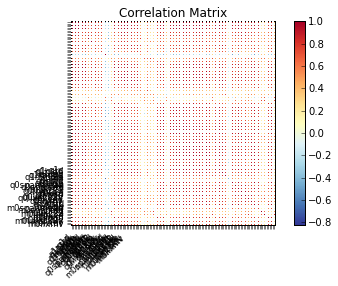

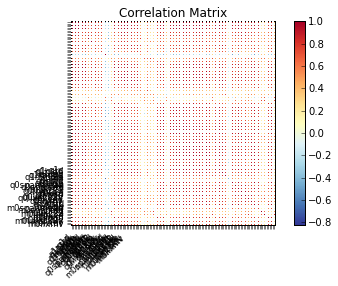

In [105]:
hie_data = datan
corr_matrix = np.corrcoef(hie_data)
sm.graphics.plot_corr(corr_matrix, xnames=list(datan.columns.values))

In [106]:
corr_matrix

array([[ 1.        ,  0.97637102,  0.97571912, ...,  0.75602644,
         0.31735195,  0.71831393],
       [ 0.97637102,  1.        ,  0.98746613, ...,  0.76108568,
         0.33198098,  0.7286019 ],
       [ 0.97571912,  0.98746613,  1.        , ...,  0.78414543,
         0.30269206,  0.73112018],
       ..., 
       [ 0.75602644,  0.76108568,  0.78414543, ...,  1.        ,
         0.23370676,  0.62539598],
       [ 0.31735195,  0.33198098,  0.30269206, ...,  0.23370676,
         1.        ,  0.12259123],
       [ 0.71831393,  0.7286019 ,  0.73112018, ...,  0.62539598,
         0.12259123,  1.        ]])

In [107]:
num_clusters=3
km = KMeans(init='k-means++', max_iter=50, n_init=1, verbose=1, n_jobs=-1, n_clusters=num_clusters)
km.fit(ydata2)

Initialization complete
Iteration  0, inertia 103601.755
Iteration  1, inertia 58602.927
Iteration  2, inertia 56897.518
Iteration  3, inertia 56144.386
Iteration  4, inertia 55878.937
Iteration  5, inertia 55332.564
Converged at iteration 5


KMeans(copy_x=True, init='k-means++', max_iter=50, n_clusters=3, n_init=1,
    n_jobs=-1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=1)

In [108]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = list(ydata2.columns.values)
for i in range(num_clusters):
    print "Cluster %d:" % i,
    for ind in order_centroids[i, :50]:
        print ' %s' % terms[ind] + ",",
    print "\n"

Cluster 0:  q1pos,  q1range,  q1high,  q1c,  q1middle,  q1cstd,  q1low, 

Cluster 1:  q1range,  q1high,  q1cstd,  q1middle,  q1c,  q1low,  q1pos, 

Cluster 2:  q1range,  q1high,  q1pos,  q1cstd,  q1c,  q1middle,  q1low, 



## Creating datasets for predictions (starting from data2 and after features selection)

In [294]:
complete = data2.copy()
completen = datan2.copy()

In [295]:
yall = complete.drop(['q1c','q1cstd','q0c','q0cstd','q0high','q0low','q0spanmean','q0spanstd','q0lixt','q0lixc72',
                      'q0lixc288','q0lixd','q0lixm','q0lixtv','q0lixc72v','q0lixc288v','q0lixdv','q0lixmv','m0c',
                      'm0cstd','m0high','m0low','m0spanmean','m0spanstd','m0lixt','m0lixc72','m0lixc288','m0lixd',
                      'm0lixm','m0lixtv','m0lixc72v','m0lixc288v','m0lixdv','m0lixmv'], 1)
yalln = completen.drop(['q1c','q1cstd','q0c','q0cstd','q0high','q0low','q0spanmean','q0spanstd','q0lixt','q0lixc72',
                      'q0lixc288','q0lixd','q0lixm','q0lixtv','q0lixc72v','q0lixc288v','q0lixdv','q0lixmv','m0c',
                      'm0cstd','m0high','m0low','m0spanmean','m0spanstd','m0lixt','m0lixc72','m0lixc288','m0lixd',
                      'm0lixm','m0lixtv','m0lixc72v','m0lixc288v','m0lixdv','m0lixmv'], 1)
yall.head(3)

,q1high,q1low,q1range,q1middle,q1pos
2015-03-20,3.195691,-2.769740,5.965430,0.212975,84.820592
2014-12-19,5.639382,-0.150157,5.789539,2.744612,91.699991
2014-09-19,1.669077,-3.476148,5.145225,-0.903535,98.113823


In [296]:
xall = complete.drop(['q1c','q1cstd','q1high','q1low','q1range','q1middle','q1pos','q0lixc72v','q0lixc288v','m0lixc288',
                    'm0lixtv','m0lixc72v','m0lixc288v','m0lixdv','m0lixmv'], 1)
xalln = completen.drop(['q1c','q1cstd','q1high','q1low','q1range','q1middle','q1pos','q0lixc72v','q0lixc288v','m0lixc288',
                    'm0lixtv','m0lixc72v','m0lixc288v','m0lixdv','m0lixmv'], 1)
xall.head(3)

,q0c,q0cstd,q0high,q0low,q0spanmean,q0spanstd,q0lixt,q0lixc72,q0lixc288,q0lixd,...,m0c,m0cstd,m0high,m0low,m0spanmean,m0spanstd,m0lixt,m0lixc72,m0lixd,m0lixm
2015-03-20,4.440649,0.812940,0.445199,-0.535186,0.987037,0.574594,32.300570,0,0,-19.985072,...,-1.768981,0.893247,0.593115,-0.571646,1.173138,0.591319,5.122899,0.000000,-3.827465,1
2014-12-19,-0.695533,0.820467,0.487591,-0.520567,1.014848,0.546768,33.217476,0,0,-19.337724,...,-0.921402,1.115442,0.731307,-0.687926,1.431070,0.552762,4.232588,-1.387678,-2.862472,1
2014-09-19,6.168292,0.462849,0.229158,-0.409953,0.642071,0.281328,42.470507,0,0,-22.704580,...,0.886301,0.498493,0.245731,-0.343030,0.590982,0.280409,7.621349,0.000000,-6.110579,1


###Q1Range

In [297]:
yr = yall.q1range
xr = xall.drop(['q0lixc288','q0lixc72','m0lixc72'], 1)
yrn = yalln.q1range
xrn = xalln.drop(['q0lixc288','q0lixc72','m0lixc72'], 1)

In [298]:
xr.columns.values

array(['q0c', 'q0cstd', 'q0high', 'q0low', 'q0spanmean', 'q0spanstd',
       'q0lixt', 'q0lixd', 'q0lixm', 'q0lixtv', 'q0lixdv', 'q0lixmv',
       'm0c', 'm0cstd', 'm0high', 'm0low', 'm0spanmean', 'm0spanstd',
       'm0lixt', 'm0lixd', 'm0lixm'], dtype=object)

###Q1Low

In [299]:
yl = yall.q1low
xl = xall.drop(['q0lixc288','q0lixt','m0c','m0spanstd','m0lixm'], 1)
yln = yalln.q1low
xln = xalln.drop(['q0lixc288','q0lixt','m0c','m0spanstd','m0lixm'], 1)

In [300]:
xl.columns.values

array(['q0c', 'q0cstd', 'q0high', 'q0low', 'q0spanmean', 'q0spanstd',
       'q0lixc72', 'q0lixd', 'q0lixm', 'q0lixtv', 'q0lixdv', 'q0lixmv',
       'm0cstd', 'm0high', 'm0low', 'm0spanmean', 'm0lixt', 'm0lixc72',
       'm0lixd'], dtype=object)

###Q1High

In [301]:
yh = yall.q1high
xh = xall.drop(['q0lixc288','q0lixt','m0c','m0spanstd','m0lixm'], 1)
yhn = yalln.q1high
xhn = xalln.drop(['q0lixc288','q0lixt','m0c','m0spanstd','m0lixm'], 1)

In [302]:
xh.columns.values

array(['q0c', 'q0cstd', 'q0high', 'q0low', 'q0spanmean', 'q0spanstd',
       'q0lixc72', 'q0lixd', 'q0lixm', 'q0lixtv', 'q0lixdv', 'q0lixmv',
       'm0cstd', 'm0high', 'm0low', 'm0spanmean', 'm0lixt', 'm0lixc72',
       'm0lixd'], dtype=object)

###Q1Middle

In [303]:
ym = yall.q1middle
xm = xall.drop(['q0c','q0cstd','q0low','q0spanmean','q0spanstd','q0lixt','q0lixc72',
               'q0lixd','q0lixm','q0lixtv','q0lixdv','q0lixmv','m0c','m0cstd','m0low','m0high','m0spanmean',
               'm0spanstd','m0lixd','m0lixm'], 1)
ymn = yalln.q1middle
xmn = xalln.drop(['q0c','q0cstd','q0low','q0spanmean','q0spanstd','q0lixt','q0lixc72',
               'q0lixd','q0lixm','q0lixtv','q0lixdv','q0lixmv','m0c','m0cstd','m0low','m0high','m0spanmean',
               'm0spanstd','m0lixd','m0lixm'], 1)

In [304]:
xm.columns.values

array(['q0high', 'q0lixc288', 'm0lixt', 'm0lixc72'], dtype=object)

###Q1Pos

In [305]:
yp = yall.q1pos
xp = xall.drop(['q0c','q0cstd','q0high','q0low','q0spanstd','q0lixt','q0lixc72','q0lixd',
               'q0lixm','q0lixtv','q0lixdv','q0lixmv','m0c','m0cstd','m0low','m0spanmean','m0spanstd','m0lixm'], 1)
ypn = yalln.q1pos
xpn = xalln.drop(['q0c','q0cstd','q0high','q0low','q0spanstd','q0lixt','q0lixc72','q0lixd',
               'q0lixm','q0lixtv','q0lixdv','q0lixmv','m0c','m0cstd','m0low','m0spanmean','m0spanstd','m0lixm'], 1)

In [306]:
xp.columns.values

array(['q0spanmean', 'q0lixc288', 'm0high', 'm0lixt', 'm0lixc72', 'm0lixd'], dtype=object)

##Supervised learning predictions

In [307]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import linregress
from pylab import *
from urllib import urlopen
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from __future__ import division
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn import tree
from sklearn.externals.six import StringIO
import os
from sklearn.externals.six import StringIO  
import pydot
from sklearn.cross_validation import StratifiedKFold
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score

In [308]:
testsize = 0.2
clf = RandomForestClassifier()
#clf = DecisionTreeClassifier()
#clf = GaussianNB()
#clf = SVC()
#clf = LogisticRegression()

###Q1low

In [309]:
X = xl
y = yl
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=testsize, random_state=0)
Xn = xln
yn = yln
Xn_train, Xn_test, yn_train, yn_test = cross_validation.train_test_split(Xn, yn, test_size=testsize, random_state=0)

In [310]:
print X.shape, X_train.shape, X_test.shape

(141, 19) (112, 19) (29, 19)


In [311]:
model = clf.fit(X_train, y_train)
modeln = clf.fit(Xn_train, yn_train)

In [312]:
q1lpred = model.predict(X_test)
q1lpredn = model.predict(Xn_test)

In [313]:
diff = (q1lpred - y_test)
diffn = (q1lpredn - yn_test)

In [314]:
print np.mean(abs(diff)), np.max(abs(diff))
print np.mean(abs(diffn)), np.max(abs(diffn))

5.83839246062 19.4803193647
0.47653958727 1.92115372868


In [315]:
pred = pd.DataFrame(columns = ['actual','predicted','difference'])
pred.actual = y_test
pred.predicted = q1lpred
pred.difference = diff
pred.head(3)

ValueError: Length of values does not match length of index

###Q1high

In [ ]:
X = xh
y = yh
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=testsize, random_state=0)
Xn = xhn
yn = yhn
Xn_train, Xn_test, yn_train, yn_test = cross_validation.train_test_split(Xn, yn, test_size=testsize, random_state=0)

In [ ]:
print X.shape, X_train.shape, X_test.shape

In [ ]:
model = clf.fit(X_train, y_train)
modeln = clf.fit(Xn_train, yn_train)

In [ ]:
q1hpred = model.predict(X_test)
q1hpredn = model.predict(Xn_test)

In [ ]:
diff = (q1hpred - y_test)
diffn = (q1hpredn - yn_test)

In [ ]:
print np.mean(abs(diff)), np.max(abs(diff))
print np.mean(abs(diffn)), np.max(abs(diffn))

###Q1range

In [ ]:
X = xr
y = yr
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=testsize, random_state=0)
Xn = xrn
yn = yrn
Xn_train, Xn_test, yn_train, yn_test = cross_validation.train_test_split(Xn, yn, test_size=testsize, random_state=0)

In [ ]:
print X.shape, X_train.shape, X_test.shape

In [ ]:
model = clf.fit(X_train, y_train)
modeln = clf.fit(Xn_train, yn_train)

In [ ]:
q1rpred = model.predict(X_test)
q1rpredn = model.predict(Xn_test)

In [ ]:
diff = (q1rpred - y_test)
diffn = (q1rpredn - yn_test)

In [ ]:
print np.mean(abs(diff)), np.max(abs(diff))
print np.mean(abs(diffn)), np.max(abs(diffn))

###Q1middle

In [ ]:
X = xm
y = ym
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=testsize, random_state=0)
Xn = xmn
yn = ymn
Xn_train, Xn_test, yn_train, yn_test = cross_validation.train_test_split(Xn, yn, test_size=testsize, random_state=0)

In [ ]:
print X.shape, X_train.shape, X_test.shape

In [ ]:
model = clf.fit(X_train, y_train)
modeln = clf.fit(Xn_train, yn_train)

In [ ]:
q1mpred = model.predict(X_test)
q1mpredn = model.predict(Xn_test)

In [ ]:
diff = (q1mpred - y_test)
diffn = (q1mpredn - yn_test)

In [ ]:
print np.mean(abs(diff)), np.max(abs(diff))
print np.mean(abs(diffn)), np.max(abs(diffn))

###Q1pos

In [ ]:
X = xp
y = yp
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=testsize, random_state=0)
Xn = xpn
yn = ypn
Xn_train, Xn_test, yn_train, yn_test = cross_validation.train_test_split(Xn, yn, test_size=testsize, random_state=0)

In [ ]:
print X.shape, X_train.shape, X_test.shape

In [ ]:
model = clf.fit(X_train, y_train)
modeln = clf.fit(Xn_train, yn_train)

In [ ]:
q1ppred = model.predict(X_test)
q1ppredn = model.predict(Xn_test)

In [ ]:
diff = (q1ppred - y_test)
diffn = (q1ppredn - yn_test)

In [ ]:
print np.mean(abs(diff)), np.max(abs(diff))
print np.mean(abs(diffn)), np.max(abs(diffn))